In [5]:
import pandas as pd 
import numpy as np 
import statsmodels as st 
import sklearn 
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt 
import seaborn as sns

In [31]:
train_df = pd.read_csv('../../data/feature/ks_train.csv')
val_df = pd.read_csv('../../data/feature/ks_validation.csv')
test_df = pd.read_csv('../../data/feature/ks_test.csv')

In [7]:
train_df.head()
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  27499 non-null  int64
 1   Age                     27499 non-null  int64
 2   Ethnicity               27499 non-null  int64
 3   Educational_Level       27499 non-null  int64
 4   Income                  27499 non-null  int64
 5   Country_region          27499 non-null  int64
 6   Hotel_Type              27499 non-null  int64
 7   Adults                  27499 non-null  int64
 8   Children                27499 non-null  int64
 9   Babies                  27499 non-null  int64
 10  Meal_Type               27499 non-null  int64
 11  Visted_Previously       27499 non-null  int64
 12  Previous_Cancellations  27499 non-null  int64
 13  Deposit_type            27499 non-null  int64
 14  Booking_channel         27499 non-null  int64
 15  Required_Car_Parkin

In [8]:
pd.crosstab(train_df['Visted_Previously'],train_df['Previous_Cancellations'])

Previous_Cancellations,0,1
Visted_Previously,,
0,18344,0
1,6035,3120


In [9]:
val = train_df.iloc[12, [8,9]]

val[0],val[1]

pr_cr_dict= {(0, 1) : 0, (1, 1): 1, (1, 0) : 2, (0, 0) : 3}
enc_df = train_df.apply(lambda rw: pr_cr_dict[(rw[8],rw[9])], axis=1)

In [10]:
nw5_df = train_df
#nw5_df['pr_vs_cn'] = enc_df

In [11]:
nw5_df.head()

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Reservation_Status
0,0,40,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,10,218,1
1,0,49,0,1,1,1,0,3,3,0,0,0,0,1,0,0,1,0,185,1
2,0,42,1,0,0,1,0,3,3,0,0,0,0,0,0,0,1,0,119,1
3,1,25,2,2,2,2,1,4,3,0,0,0,0,1,1,0,0,5,144,1
4,0,62,0,3,3,1,2,1,1,0,0,0,0,0,2,1,0,10,242,1


In [12]:
def cals_VIF(df):

    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]

    return vif

In [13]:
cals_VIF(nw5_df)

,variables,VIF
0,Gender,1.961200
1,Age,7.940158
2,Ethnicity,2.731511
3,Educational_Level,3.349788
4,Income,2.425127
5,Country_region,3.250732
6,Hotel_Type,2.438592
7,Adults,4.589982
8,Children,6.166522
9,Babies,1.368274


In [14]:
def pca_perc_var_plot(df):
    df = df.copy()
    pca = PCA(n_components=df.shape[1])
    pca_data = pca.fit_transform(df)

    percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
    cumm_var_explained = np.cumsum(percent_var_explained)
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(cumm_var_explained, 'bo-')
    ax.grid()
    ax.set_title("percentage of variation explained")
    ax.set_xlabel("n_components")
    ax.set_ylabel("% variance explained")
    return fig

def pca_scree_plot(df):
    df = df.copy()
    pca = PCA(n_components=df.shape[1])
    pca_data = pca.fit_transform(df)

    pcs = np.arange(pca.n_components_)+1
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(pcs, pca.explained_variance_ratio_, 'ro-', linewidth=2)
    ax.set_title('Scree Plot')
    ax.set_xlabel('Principal Component')
    ax.set_ylabel('Proportion of Variance Explained')
    return fig
    

In [15]:
nw5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  27499 non-null  int64
 1   Age                     27499 non-null  int64
 2   Ethnicity               27499 non-null  int64
 3   Educational_Level       27499 non-null  int64
 4   Income                  27499 non-null  int64
 5   Country_region          27499 non-null  int64
 6   Hotel_Type              27499 non-null  int64
 7   Adults                  27499 non-null  int64
 8   Children                27499 non-null  int64
 9   Babies                  27499 non-null  int64
 10  Meal_Type               27499 non-null  int64
 11  Visted_Previously       27499 non-null  int64
 12  Previous_Cancellations  27499 non-null  int64
 13  Deposit_type            27499 non-null  int64
 14  Booking_channel         27499 non-null  int64
 15  Required_Car_Parkin

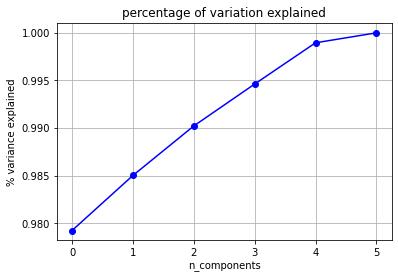

In [16]:
fig=pca_perc_var_plot(nw5_df.iloc[:, [0,1,2,3,4,5]])
fig.savefig('C:/Users/Tharindu/Desktop/Professional development/Competitions/Datastorm2021/Round1report/CatBoost Visualizations/percentagevar1.png')

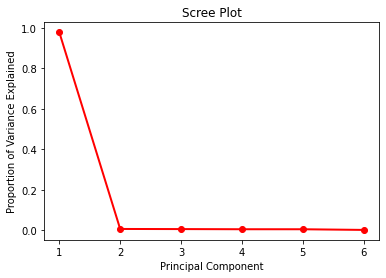

In [17]:
fig=pca_scree_plot(nw5_df.iloc[:, [0,1,2,3,4,5]])
fig.savefig('C:/Users/Tharindu/Desktop/Professional development/Competitions/Datastorm2021/Round1report/CatBoost Visualizations/screeplot1.png')

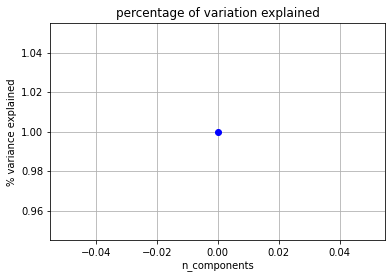

In [18]:

pca_df = PCA(n_components=1)
pca_data = pca_df.fit_transform(nw5_df.iloc[:, [0,1,2,3,4,5]])
fig=pca_perc_var_plot(pca_data)
fig.savefig('C:/Users/Tharindu/Desktop/Professional development/Competitions/Datastorm2021/Round1report/CatBoost Visualizations/percentagevar2.png')


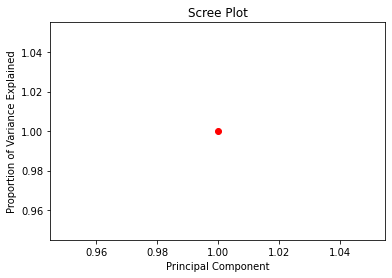

In [19]:
fig=pca_scree_plot(pca_data)
fig.savefig('C:/Users/Tharindu/Desktop/Professional development/Competitions/Datastorm2021/Round1report/CatBoost Visualizations/screeplot2.png')

In [20]:
pca_data

array([[-3.97579575],
       [ 5.02342737],
       [-1.97651561],
       ...,
       [ 5.02278506],
       [21.0217984 ],
       [ 4.02280468]])

In [21]:
nw6_df = nw5_df.drop(columns=['Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income',
       'Country_region'])
nw6_df['pers_pca'] = pca_data

In [22]:
cals_VIF(nw6_df)

,variables,VIF
0,Hotel_Type,2.405452
1,Adults,4.441054
2,Children,5.857519
3,Babies,1.363436
4,Meal_Type,1.804364
5,Visted_Previously,1.999926
6,Previous_Cancellations,1.517366
7,Deposit_type,1.412597
8,Booking_channel,1.643811
9,Required_Car_Parking,1.384589


In [23]:
nw7_df = nw6_df.drop(columns=['pr_vs_cn'])

KeyError: "['pr_vs_cn'] not found in axis"

In [24]:
cals_VIF(nw7_df)

NameError: name 'nw7_df' is not defined

In [115]:
nw8_df = nw6_df.drop(columns=['Room_Rate'])

In [116]:
cals_VIF(nw8_df)

,variables,VIF
0,Hotel_Type,2.406092
1,Adults,4.428342
2,Children,5.750532
3,Babies,1.360709
4,Meal_Type,1.801151
5,Deposit_type,1.411570
6,Booking_channel,1.643580
7,Required_Car_Parking,1.384184
8,Use_Promotion,2.079078
9,Discount_Rate,3.427320


In [26]:
def value_to_color(n_colors, palette, color_min, color_max,val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def hinton_plot(data, columns=[], corr_func='pearson'):
    if columns == []:
        corr = data.corr(method=corr_func)
    else:
        data = data.loc[:,columns]
        corr = data.corr(method=corr_func)

    corr = pd.melt(corr.reset_index(), id_vars='index')
    corr.columns = ['x','y','value']

    x = corr['x']
    y = corr['y']
    size = corr['value']

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1)
    fig, ax = plt.subplots() 
    ax = plt.subplot(plot_grid[:,:-1])

    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)}

    size_scale = 500
    n_colors = 256
    palette = sns.diverging_palette(20, 220, n=n_colors) 
    color_min, color_max = [-1, 1]

    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num),
        s=size*size_scale,
        c=size.apply(lambda x: value_to_color(n_colors, palette, color_min, color_max, x)),
        marker='s'
    )

    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    ax.set_title("hintonmap for multi-colinearity between features")

    ax = plt.subplot(plot_grid[:,-1])

    col_x = [0]*len(palette)
    bar_y = np.linspace(color_min, color_max, n_colors)
    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )

    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right()
    return fig
    

ipykernel_launcher:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
c:\Users\Tharindu\Desktop\Professional development\Competitions\Datastorm2021\datastorm-2021\venv\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


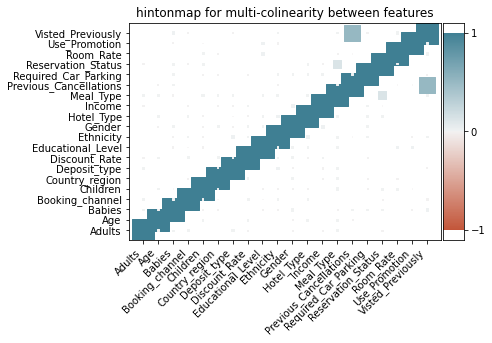

In [27]:
fig = hinton_plot(train_df, train_df.columns.values)

ipykernel_launcher:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


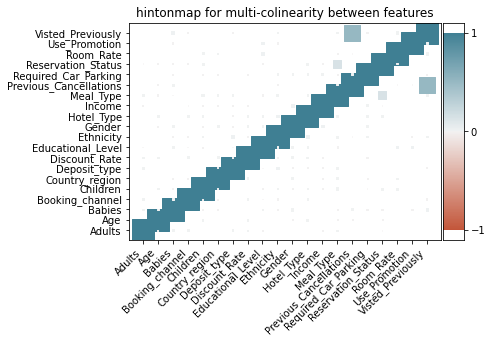

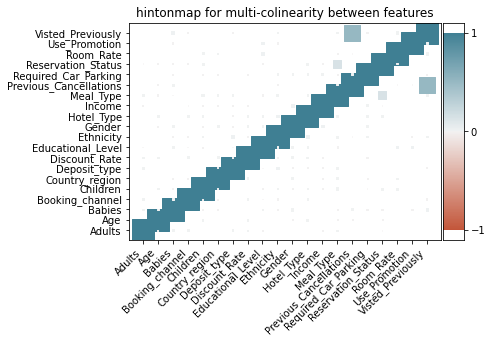

In [28]:
hinton_plot(train_df, train_df.columns.values,'spearman')

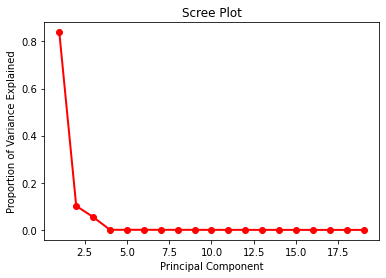

In [29]:
fig=pca_scree_plot(train_df.iloc[:, :-1])
fig.savefig('C:/Users/Tharindu/Desktop/Professional development/Competitions/Datastorm2021/Round1report/CatBoost Visualizations/screeplot3.png')

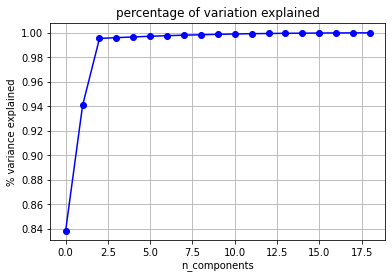

In [30]:
fig=pca_perc_var_plot(train_df.iloc[:, :-1])
fig.savefig('C:/Users/Tharindu/Desktop/Professional development/Competitions/Datastorm2021/Round1report/CatBoost Visualizations/percentagevar3.png')

In [33]:
def corr_wt_target(df, target, columns):
    absCorr = []
    for col in columns:
        absCorr.append(abs(df[target].corr(df[col])))

    fig,ax = plt.subplots()
    ax = sns.lineplot(columns,absCorr)
    ax.set_xticklabels(df.columns,rotation=45, horizontalalignment='right')
    ax.set_title("Absolute correlation of features with the target")
    return fig

In [32]:
cols = train_df.columns[:-1]

c:\Users\Tharindu\Desktop\Professional development\Competitions\Datastorm2021\datastorm-2021\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
ipykernel_launcher:8: UserWarning: FixedFormatter should only be used together with FixedLocator


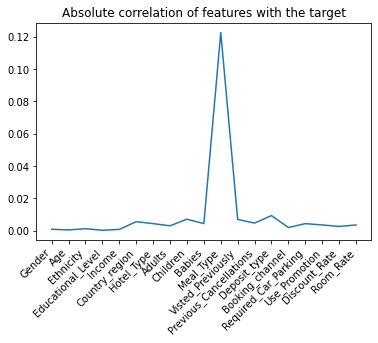

In [34]:
fig=corr_wt_target(train_df,'Reservation_Status', cols)

In [35]:
cals_VIF(train_df)

,variables,VIF
0,Gender,1.961200
1,Age,7.940158
2,Ethnicity,2.731511
3,Educational_Level,3.349788
4,Income,2.425127
5,Country_region,3.250732
6,Hotel_Type,2.438592
7,Adults,4.589982
8,Children,6.166522
9,Babies,1.368274


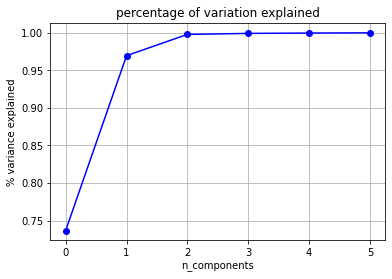

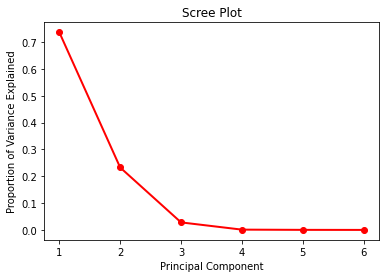

In [82]:
tol_pca = PCA(n_components=6)
tol_pca_df = tol_pca.fit_transform(train_df)
fig=pca_perc_var_plot(tol_pca_df)
fig.savefig('C:/Users/Tharindu/Desktop/Professional development/Competitions/Datastorm2021/Round1report/CatBoost Visualizations/percentagevar4.png')
fig=pca_scree_plot(tol_pca_df)
fig.savefig('C:/Users/Tharindu/Desktop/Professional development/Competitions/Datastorm2021/Round1report/CatBoost Visualizations/screeplot4.png')